In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
import datetime as dt

In [27]:
df = pd.read_excel('../data/base_final.xlsx').drop(columns='Unnamed: 0', axis=1)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26898 entries, 0 to 26897
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   categoria    26898 non-null  object        
 1   href         26896 non-null  object        
 2   fecha        26898 non-null  datetime64[ns]
 3   title        26898 non-null  object        
 4   year         26898 non-null  int64         
 5   tokens       26898 non-null  object        
 6   lem_tokens   26898 non-null  object        
 7   taggedWords  26898 non-null  object        
 8   nouns        26898 non-null  object        
 9   verbs        26898 non-null  object        
 10  adjectives   26898 non-null  object        
 11  bigrams      26898 non-null  object        
 12  neg          26898 non-null  float64       
 13  neu          26898 non-null  float64       
 14  pos          26898 non-null  float64       
 15  compound     26898 non-null  float64       
 16  comp

In [29]:
df.categoria.unique()

array(['Mundo', 'Internacional', 'Economía', 'Política', 'Mercados',
       'Empresas'], dtype=object)

### Politica

In [30]:
politica = df[df['categoria'] == 'Política']
politica = politica.groupby(['fecha']).agg({'compound': 'mean'}).reset_index()
politica['SMA_5'] = politica['compound'].rolling(window = 5, min_periods = 1).mean()
politica['SMA_20'] = politica['compound'].rolling(window = 20, min_periods = 1).mean()


<AxesSubplot:xlabel='fecha', ylabel='compound'>

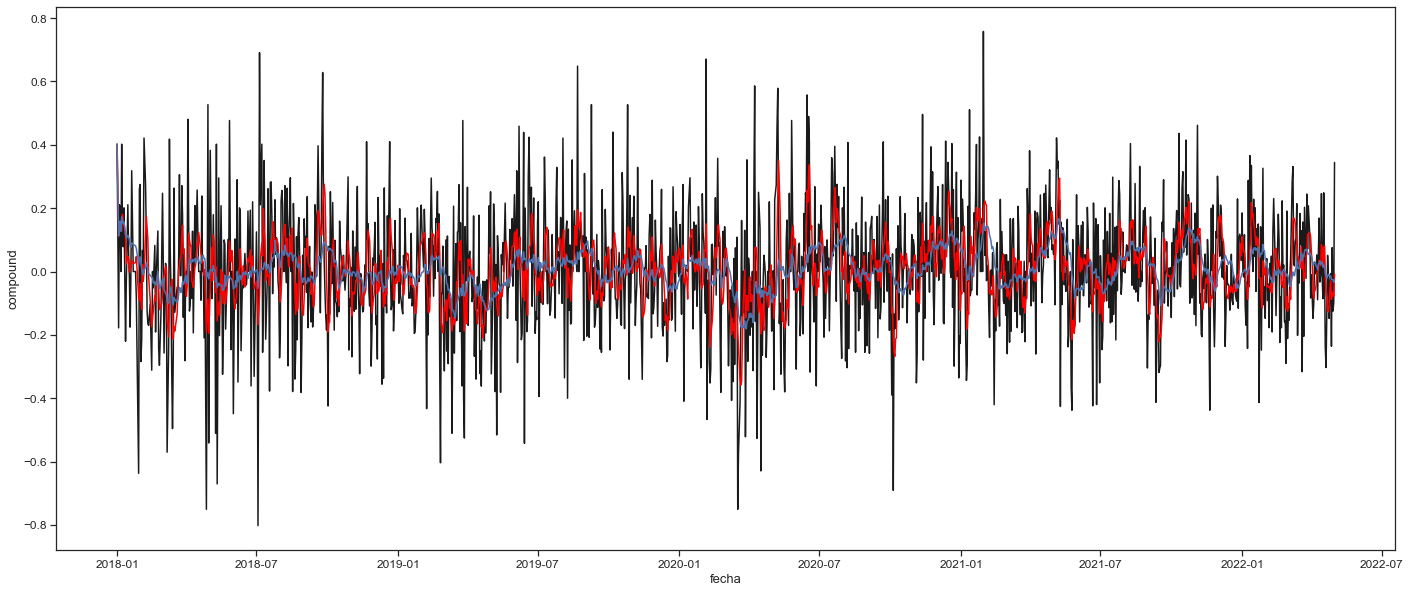

In [31]:
sns.set('notebook', style = "ticks", font_scale= 1.08)
plt.figure(figsize=(24,10))
sns.lineplot(data=politica, x = 'fecha', y = 'compound', color = 'k')
sns.lineplot(data=politica, x = 'fecha', y = 'SMA_5', color= 'red')
sns.lineplot(data=politica, x = 'fecha', y = 'SMA_20', color= 'b')


---

### noticias exterior

In [32]:
exterior = df[(df['categoria'] == 'Mundo') | (df['categoria'] == 'Internacional')]
exterior = exterior.groupby(['fecha']).agg({'compound': 'mean'}).reset_index()
exterior['SMA_5'] = exterior['compound'].rolling(window = 5, min_periods = 1).mean()
exterior['SMA_20'] = exterior['compound'].rolling(window = 20, min_periods = 1).mean()



#### exterior y politica

- compound

<AxesSubplot:xlabel='fecha', ylabel='compound'>

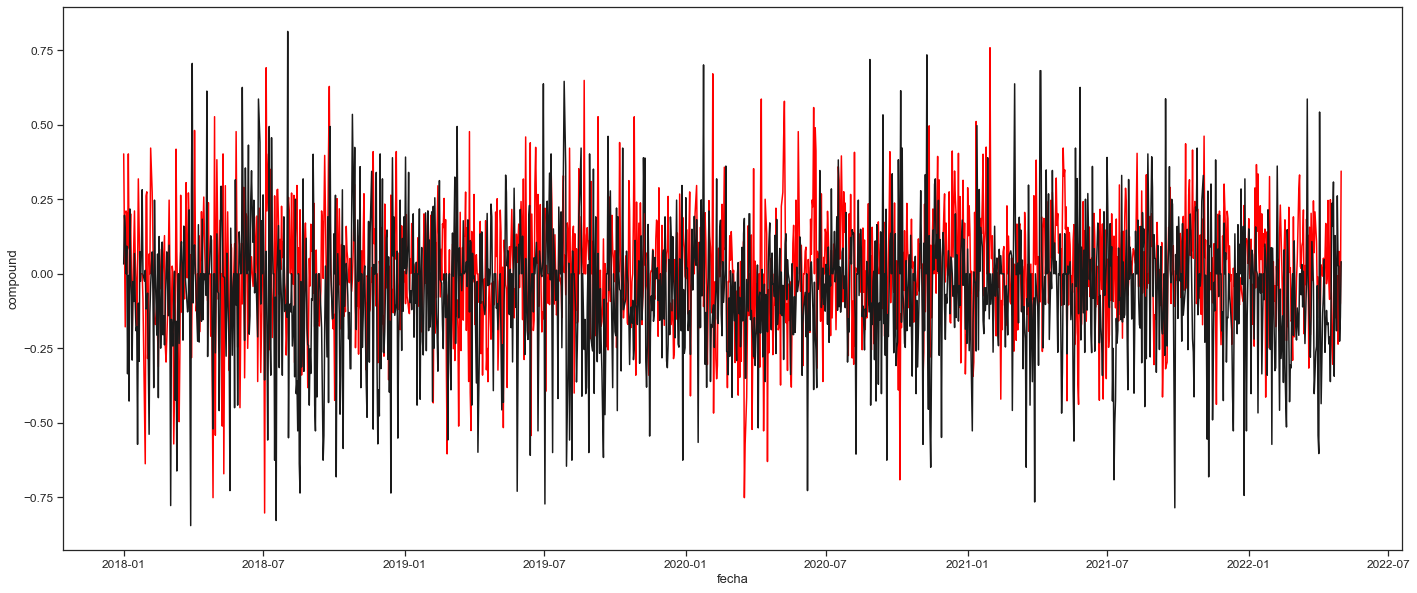

In [33]:
sns.set('notebook', style = "ticks", font_scale= 1.08)
plt.figure(figsize=(24,10))
#sns.lineplot(data=politica, x = 'fecha', y = 'compound', color = 'k')
sns.lineplot(data=politica, x = 'fecha', y = 'compound', color= 'red')
sns.lineplot(data=exterior, x = 'fecha', y = 'compound', color= 'k')

- sma5

<AxesSubplot:xlabel='fecha', ylabel='SMA_5'>

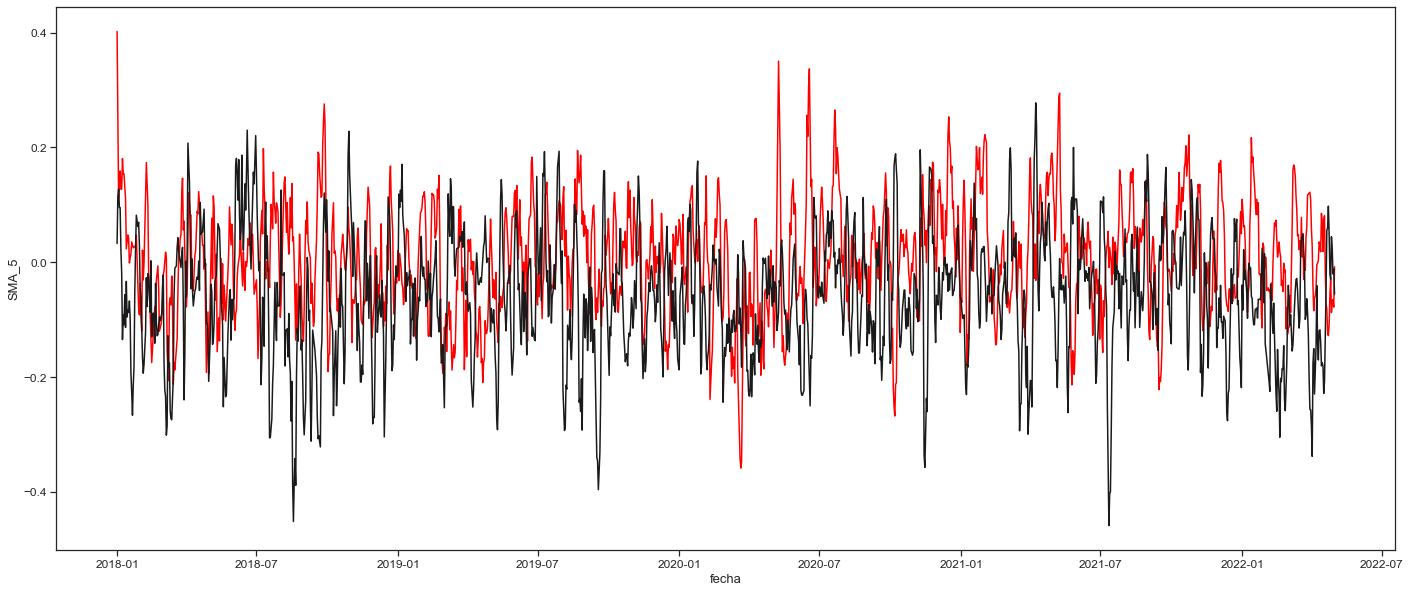

In [34]:
sns.set('notebook', style = "ticks", font_scale= 1.08)
plt.figure(figsize=(24,10))
#sns.lineplot(data=politica, x = 'fecha', y = 'compound', color = 'k')
sns.lineplot(data=politica, x = 'fecha', y = 'SMA_5', color= 'red')
sns.lineplot(data=exterior, x = 'fecha', y = 'SMA_5', color= 'k')

---
### Mercados  

In [35]:
mercados = df[df['categoria'] == 'Mercados']
mercados = mercados.groupby(['fecha']).agg({'compound': 'mean'}).reset_index()
mercados['SMA_5'] = mercados['compound'].rolling(window = 5, min_periods = 1).mean()
mercados['SMA_20'] = mercados['compound'].rolling(window = 20, min_periods = 1).mean()

<AxesSubplot:xlabel='fecha', ylabel='SMA_5'>

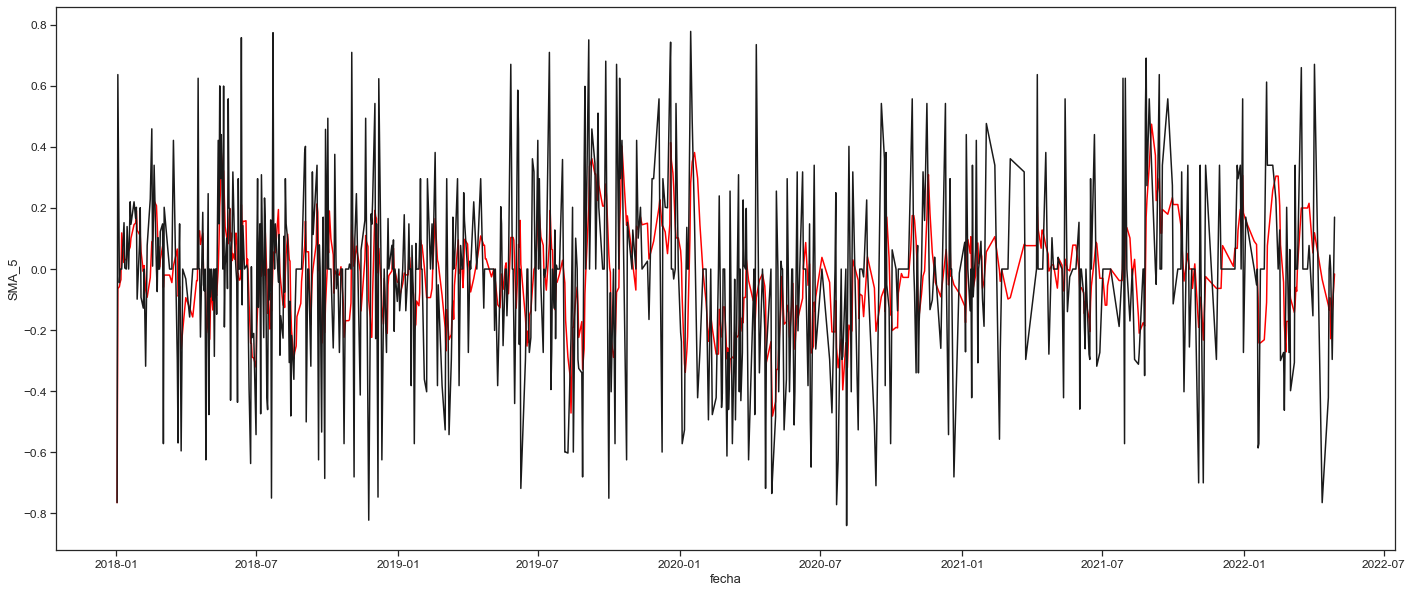

In [36]:
sns.set('notebook', style = "ticks", font_scale= 1.08)
plt.figure(figsize=(24,10))
#sns.lineplot(data=politica, x = 'fecha', y = 'compound', color = 'k')
sns.lineplot(data=mercados, x = 'fecha', y = 'SMA_5', color= 'red')
sns.lineplot(data=mercados, x = 'fecha', y = 'compound', color= 'k')

--- 
### Empresas


In [37]:
empresas = df[df['categoria'] == 'Empresas']
empresas = empresas.groupby(['fecha']).agg({'compound': 'mean'}).reset_index()
empresas['SMA_5'] = empresas['compound'].rolling(window = 5, min_periods = 1).mean()
empresas['SMA_20'] = empresas['compound'].rolling(window = 20, min_periods = 1).mean()

<AxesSubplot:xlabel='fecha', ylabel='SMA_5'>

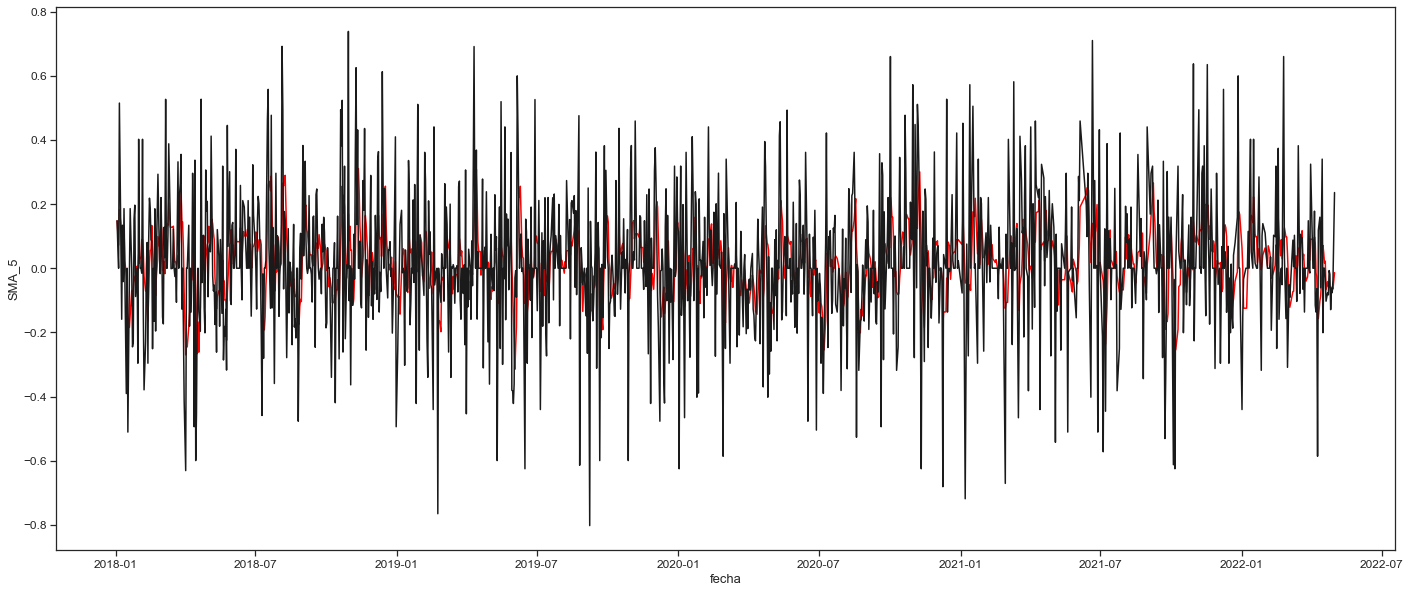

In [38]:
sns.set('notebook', style = "ticks", font_scale= 1.08)
plt.figure(figsize=(24,10))
#sns.lineplot(data=politica, x = 'fecha', y = 'compound', color = 'k')
sns.lineplot(data=empresas, x = 'fecha', y = 'SMA_5', color= 'red')
sns.lineplot(data=empresas, x = 'fecha', y = 'compound', color= 'k')

--- 
### Economía

In [39]:
economia = df[df['categoria'] == 'Economía']
economia = economia.groupby(['fecha']).agg({'compound': 'mean'}).reset_index()
economia['SMA_5'] = economia['compound'].rolling(window = 5, min_periods = 1).mean()
economia['SMA_20'] = economia['compound'].rolling(window = 20, min_periods = 1).mean()

<AxesSubplot:xlabel='fecha', ylabel='SMA_5'>

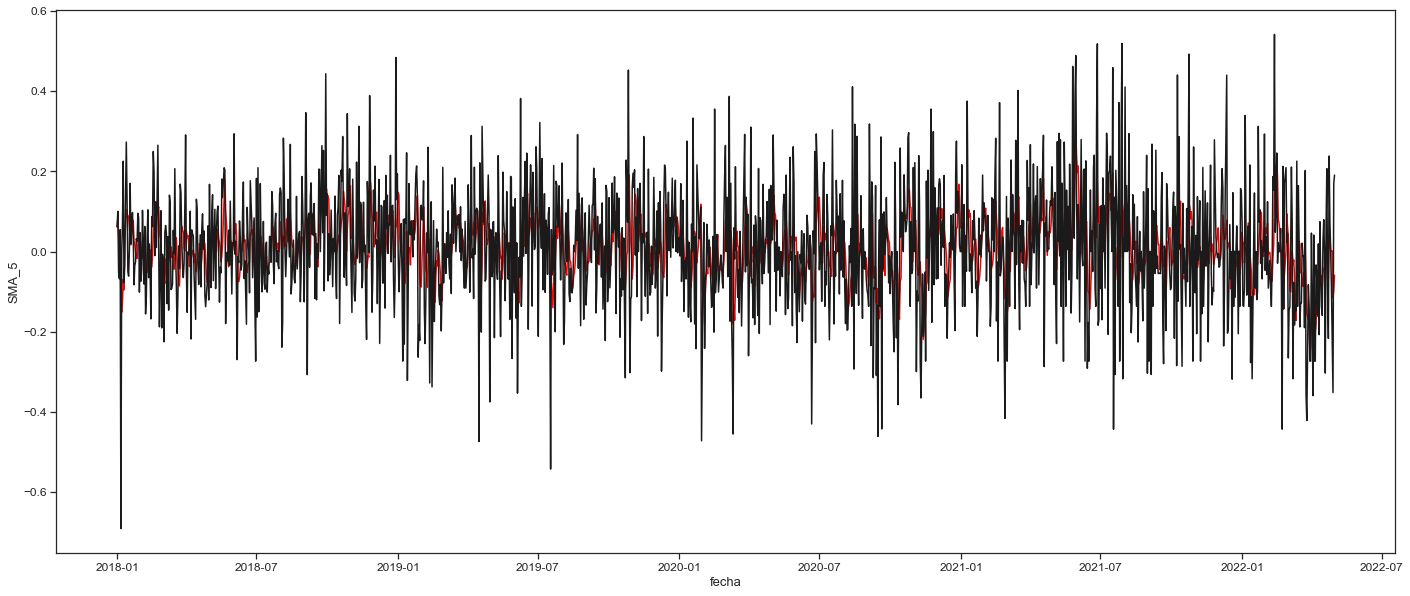

In [40]:
sns.set('notebook', style = "ticks", font_scale= 1.08)
plt.figure(figsize=(24,10))
#sns.lineplot(data=politica, x = 'fecha', y = 'compound', color = 'k')
sns.lineplot(data=economia, x = 'fecha', y = 'SMA_5', color= 'red')
sns.lineplot(data=economia, x = 'fecha', y = 'compound', color= 'k')

- economia vs mercados vs empresas

<AxesSubplot:xlabel='fecha', ylabel='compound'>

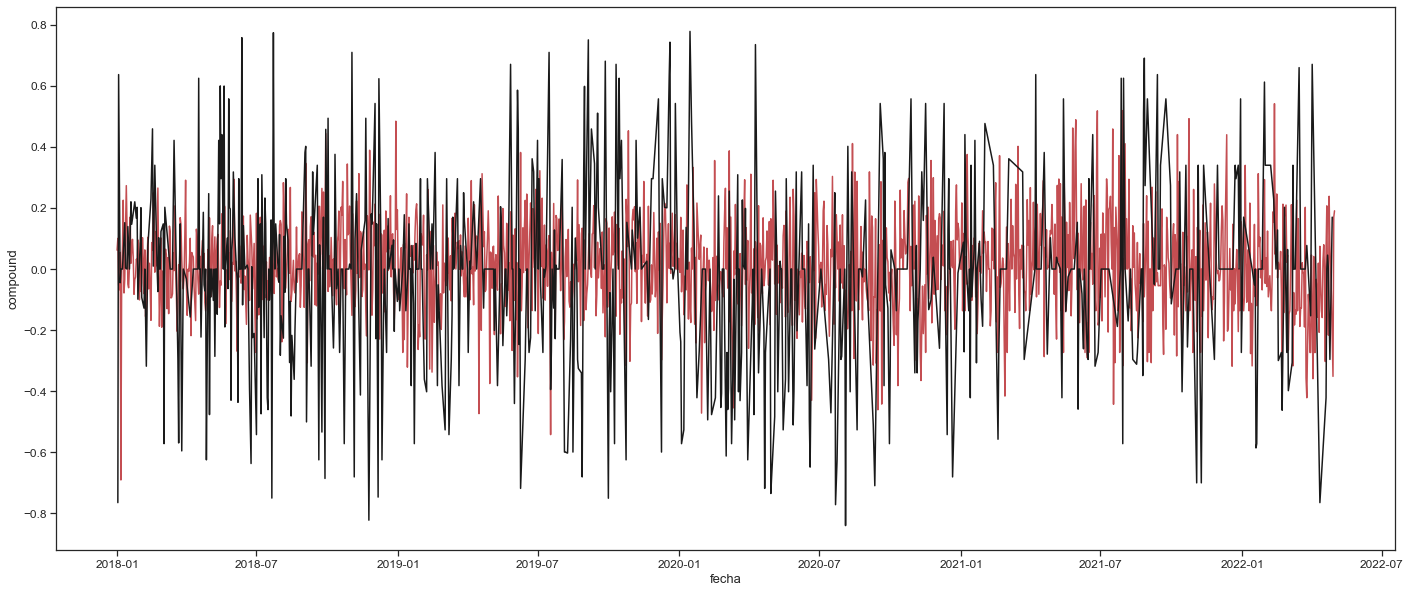

In [41]:
sns.set('notebook', style = "ticks", font_scale= 1.08)
plt.figure(figsize=(24,10))

sns.lineplot(data=economia, x = 'fecha', y = 'compound', color= 'r')
#sns.lineplot(data=empresas, x = 'fecha', y = 'compound', color= 'b')
sns.lineplot(data=mercados, x = 'fecha', y = 'compound', color= 'k')

---

In [42]:
interior = df[(df['categoria'] == 'Economía') | (df['categoria'] == 'Mercados') ]
interior = interior.groupby(['fecha']).agg({'compound': 'mean'}).reset_index()
interior['SMA_5'] = interior['compound'].rolling(window = 5, min_periods = 1).mean()
interior['SMA_20'] = interior['compound'].rolling(window = 20, min_periods = 1).mean()

<AxesSubplot:xlabel='fecha', ylabel='SMA_5'>

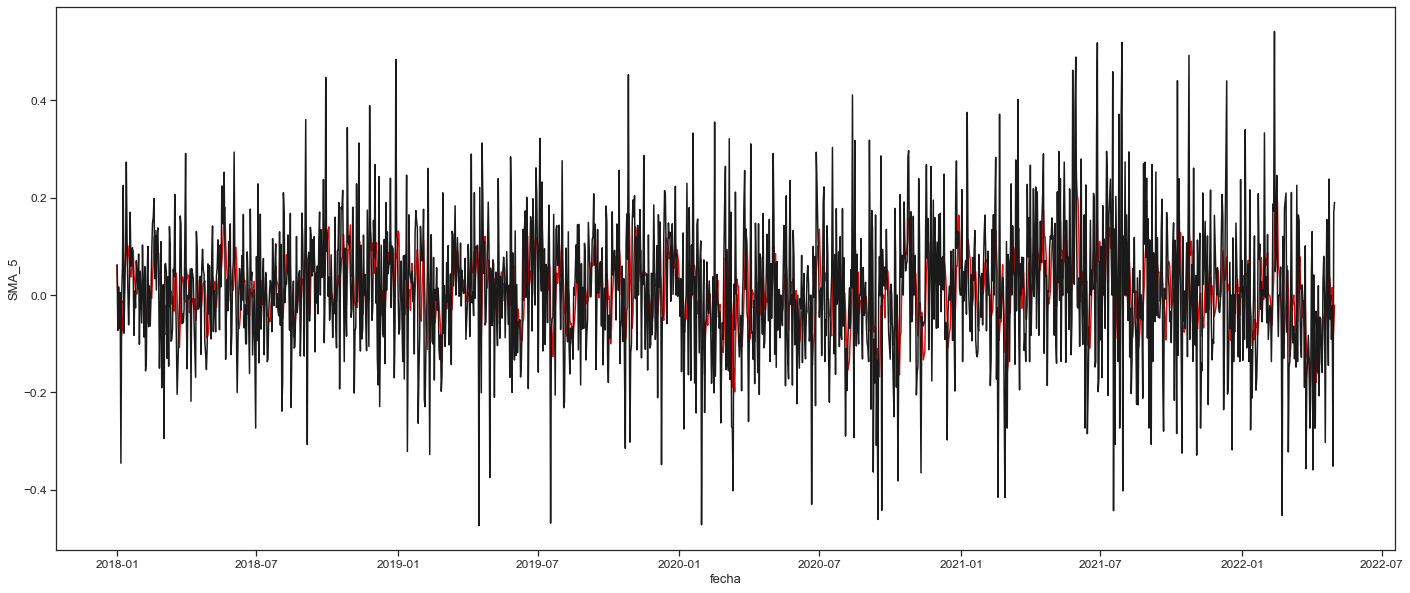

In [43]:
sns.set('notebook', style = "ticks", font_scale= 1.08)
plt.figure(figsize=(24,10))
#sns.lineplot(data=politica, x = 'fecha', y = 'compound', color = 'k')
sns.lineplot(data=interior, x = 'fecha', y = 'SMA_5', color= 'red')
sns.lineplot(data=interior, x = 'fecha', y = 'compound', color= 'k')

---


In [44]:
mundo = df[(df['categoria'] == 'Mundo') ]
mundo = mundo.groupby(['fecha']).agg({'compound': 'mean'}).reset_index()
mundo['SMA_5'] = mundo['compound'].rolling(window = 5, min_periods = 1).mean()
mundo['SMA_20'] = mundo['compound'].rolling(window = 20, min_periods = 1).mean()


<AxesSubplot:xlabel='fecha', ylabel='SMA_5'>

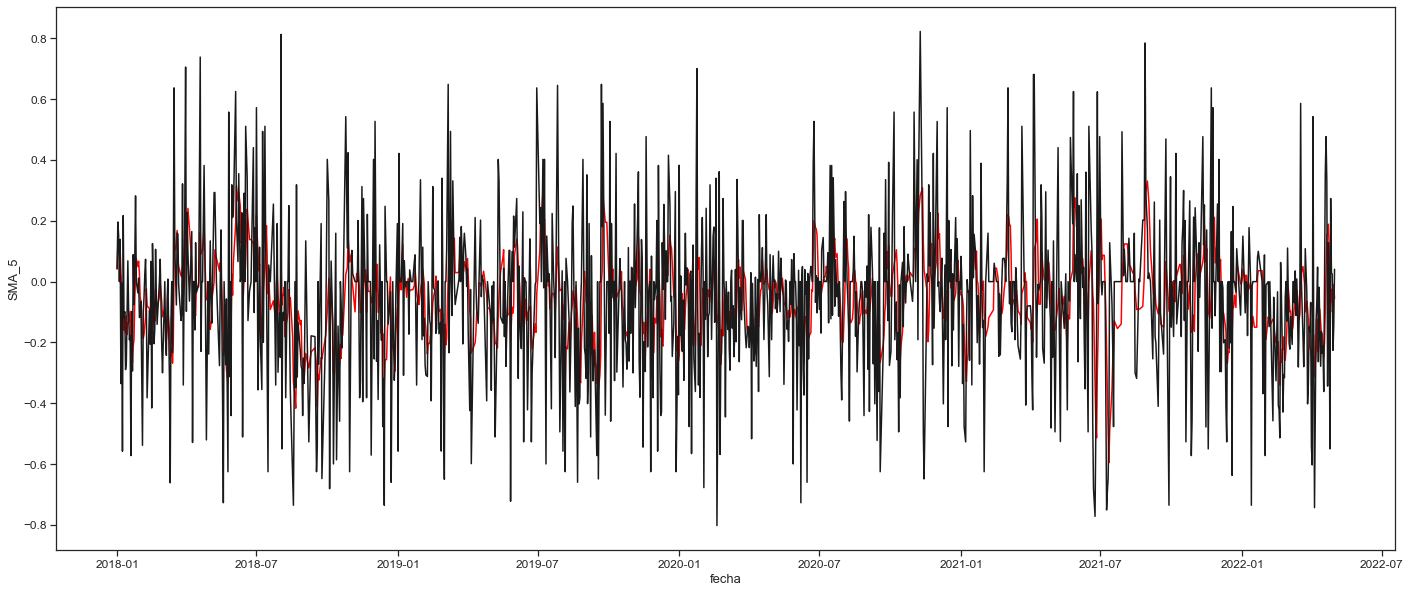

In [45]:
sns.set('notebook', style = "ticks", font_scale= 1.08)
plt.figure(figsize=(24,10))
#sns.lineplot(data=politica, x = 'fecha', y = 'compound', color = 'k')
sns.lineplot(data=mundo, x = 'fecha', y = 'SMA_5', color= 'red')
sns.lineplot(data=mundo, x = 'fecha', y = 'compound', color= 'k')

In [46]:
internacional = df[(df['categoria'] == 'Internacional') ]
internacional = internacional.groupby(['fecha']).agg({'compound': 'mean'}).reset_index()
internacional['SMA_5'] = internacional['compound'].rolling(window = 5, min_periods = 1).mean()
internacional['SMA_20'] = internacional['compound'].rolling(window = 20, min_periods = 1).mean()

In [47]:
df.fecha.value_counts()

2020-01-26    25
2018-02-08    25
2020-01-20    25
2018-12-18    24
2018-07-24    24
              ..
2018-10-07     5
2019-06-21     5
2021-10-09     5
2018-06-30     3
2018-06-27     2
Name: fecha, Length: 1582, dtype: int64

<AxesSubplot:xlabel='fecha', ylabel='SMA_5'>

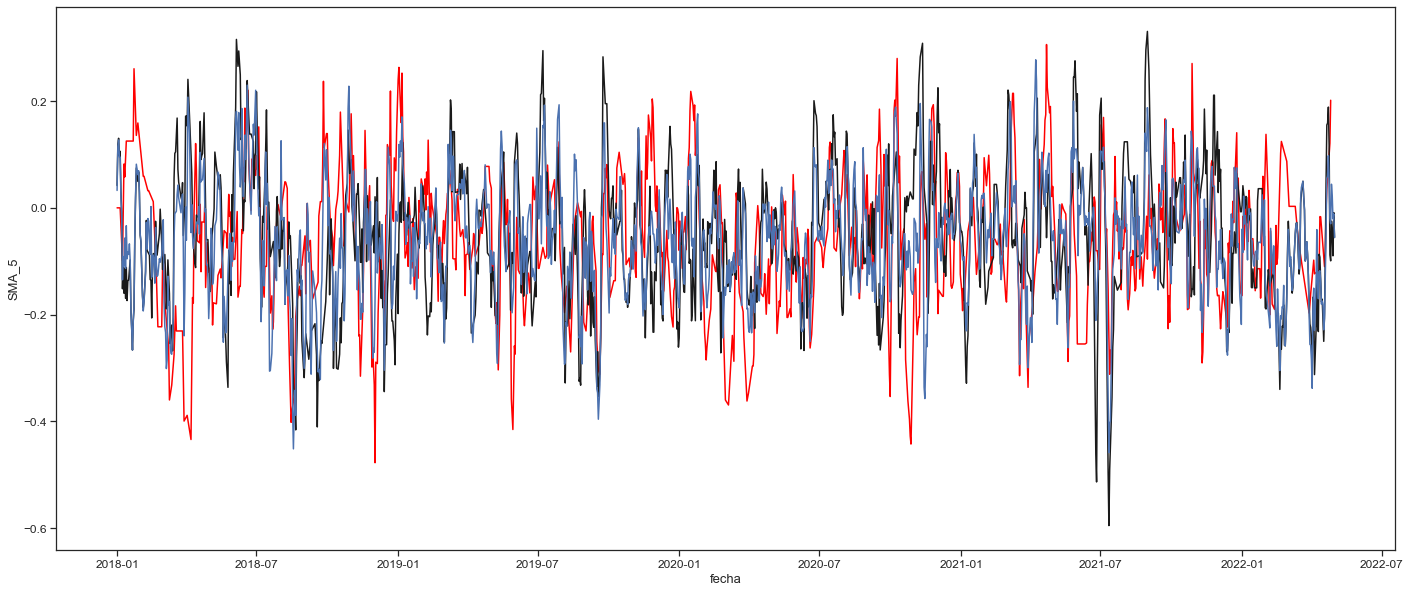

In [48]:
sns.set('notebook', style = "ticks", font_scale= 1.08)
plt.figure(figsize=(24,10))
#sns.lineplot(data=politica, x = 'fecha', y = 'compound', color = 'k')
sns.lineplot(data=internacional, x = 'fecha', y = 'SMA_5', color= 'red')
#sns.lineplot(data=internacional, x = 'fecha', y = 'compound', color= 'k')
sns.lineplot(data=mundo, x = 'fecha', y = 'SMA_5', color= 'k')
sns.lineplot(data=exterior, x = 'fecha', y = 'SMA_5', color= 'b')


---


In [49]:

general = df.groupby(['fecha']).agg({'compound': 'mean'}).reset_index()
general['SMA_5'] = general['compound'].rolling(window = 5, min_periods = 1).mean()
general['SMA_20'] = general['compound'].rolling(window = 20, min_periods = 1).mean()

---

## joining data

- politica
- exterior
- economia 
- mercados 
- internacional
- mundo
- empresas

In [50]:
politica.rename(columns={'compound': 'politica_compound', 'SMA_5': 'SMA_5_politica','SMA_20': 'SMA_20_politica'}, inplace=True)
exterior.rename(columns={'compound': 'exterior_compound', 'SMA_5': 'SMA_5_exterior','SMA_20': 'SMA_20_exterior'}, inplace=True)
economia.rename(columns={'compound': 'economia_compound', 'SMA_5': 'SMA_5_economia','SMA_20': 'SMA_20_economia'}, inplace=True)
mercados.rename(columns={'compound': 'mercados_compound', 'SMA_5': 'SMA_5_mercados','SMA_20': 'SMA_20_mercados'}, inplace=True)
internacional.rename(columns={'compound': 'internacional_compound', 'SMA_5': 'SMA_5_internacional','SMA_20': 'SMA_20_internacional'}, inplace=True)
interior.rename(columns={'compound': 'interior_compound', 'SMA_5': 'SMA_5_interior','SMA_20': 'SMA_20_interior'}, inplace=True)
empresas.rename(columns={'compound': 'empresas_compound', 'SMA_5': 'SMA_5_empresas','SMA_20': 'SMA_20_empresas'}, inplace=True)
mundo.rename(columns={'compound': 'mundo_compound', 'SMA_5': 'SMA_5_MUNDO','SMA_20': 'SMA_20_MUNDO'}, inplace=True)
general.rename(columns={'compound': 'general_compound', 'SMA_5': 'SMA_5_general','SMA_20': 'SMA_20_general'}, inplace=True)

In [51]:
indices = general.merge(politica, how='left', on='fecha').merge(exterior, how='left',on='fecha').merge(economia, how='left',on= 'fecha').merge(mercados, how='left',on='fecha'
).merge(internacional,how='left',on='fecha').merge(interior,how='left',on='fecha').merge(empresas,how='left',on='fecha').merge(mundo,how='left',on='fecha')

<AxesSubplot:xlabel='fecha', ylabel='economia_compound'>

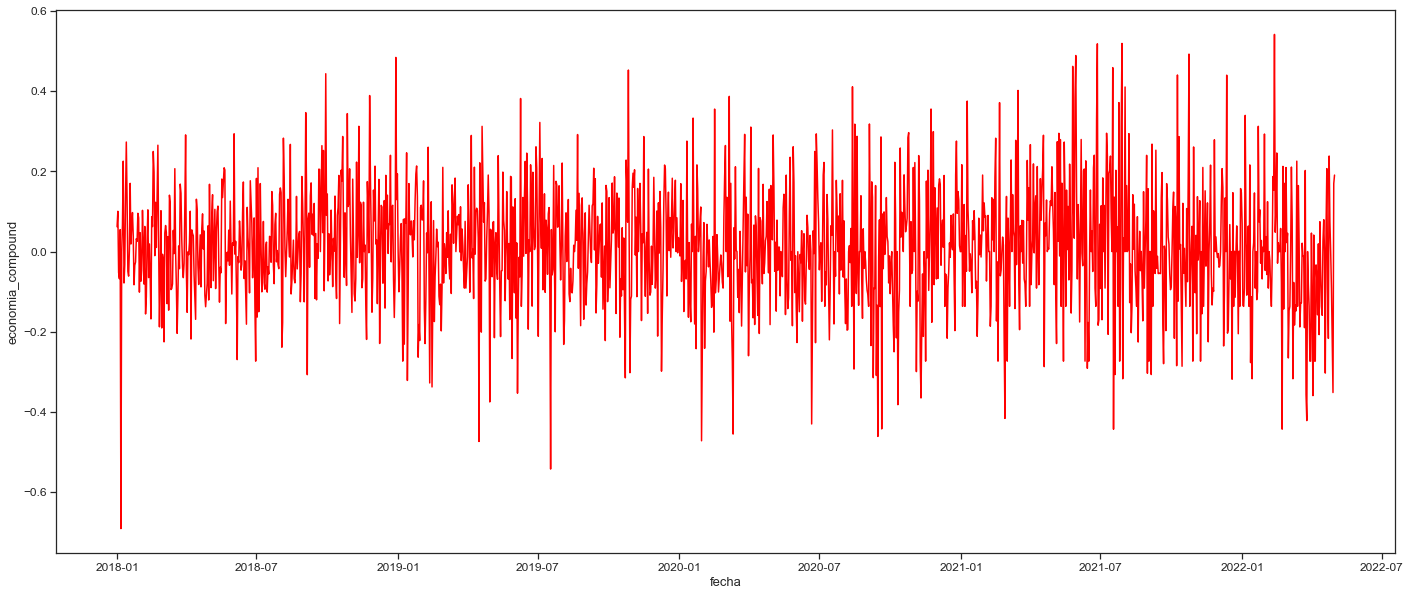

In [56]:
sns.set('notebook', style = "ticks", font_scale= 1.08)
plt.figure(figsize=(24,10))
#sns.lineplot(data=politica, x = 'fecha', y = 'compound', color = 'k')
sns.lineplot(data=indices, x = 'fecha', y = 'economia_compound', color= 'red')
#sns.lineplot(data=internacional, x = 'fecha', y = 'compound', color= 'k')
#sns.lineplot(data=indices, x = 'fecha', y = 'SMA_5_politica', color= 'k')
#sns.lineplot(data=indices, x = 'fecha', y = 'SMA_5_mercados', color= 'b')
#sns.lineplot(data=indices, x = 'fecha', y = 'SMA_5_MUNDO', color= 'g')
#sns.lineplot(data=indices, x = 'fecha', y = 'SMA_5_general', color= 'y')




In [53]:
indices = indices.fillna(0)

In [54]:
indices.to_excel('../data/indices.xlsx')

---
- Politica
- Economía 
- Internacional 
- Mercados  

<AxesSubplot:xlabel='internacional_compound', ylabel='Density'>

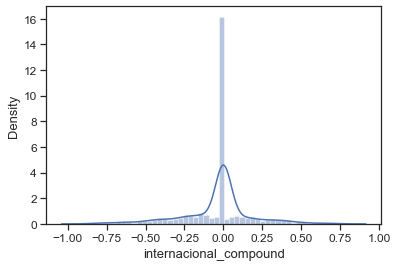

In [79]:
#sns.distplot(indices.economia_compound)
#sns.distplot(indices.politica_compound)
sns.distplot(indices.internacional_compound)
#sns.distplot(indices.mercados_compound)


Text(0.5, 1.0, 'Mercados')

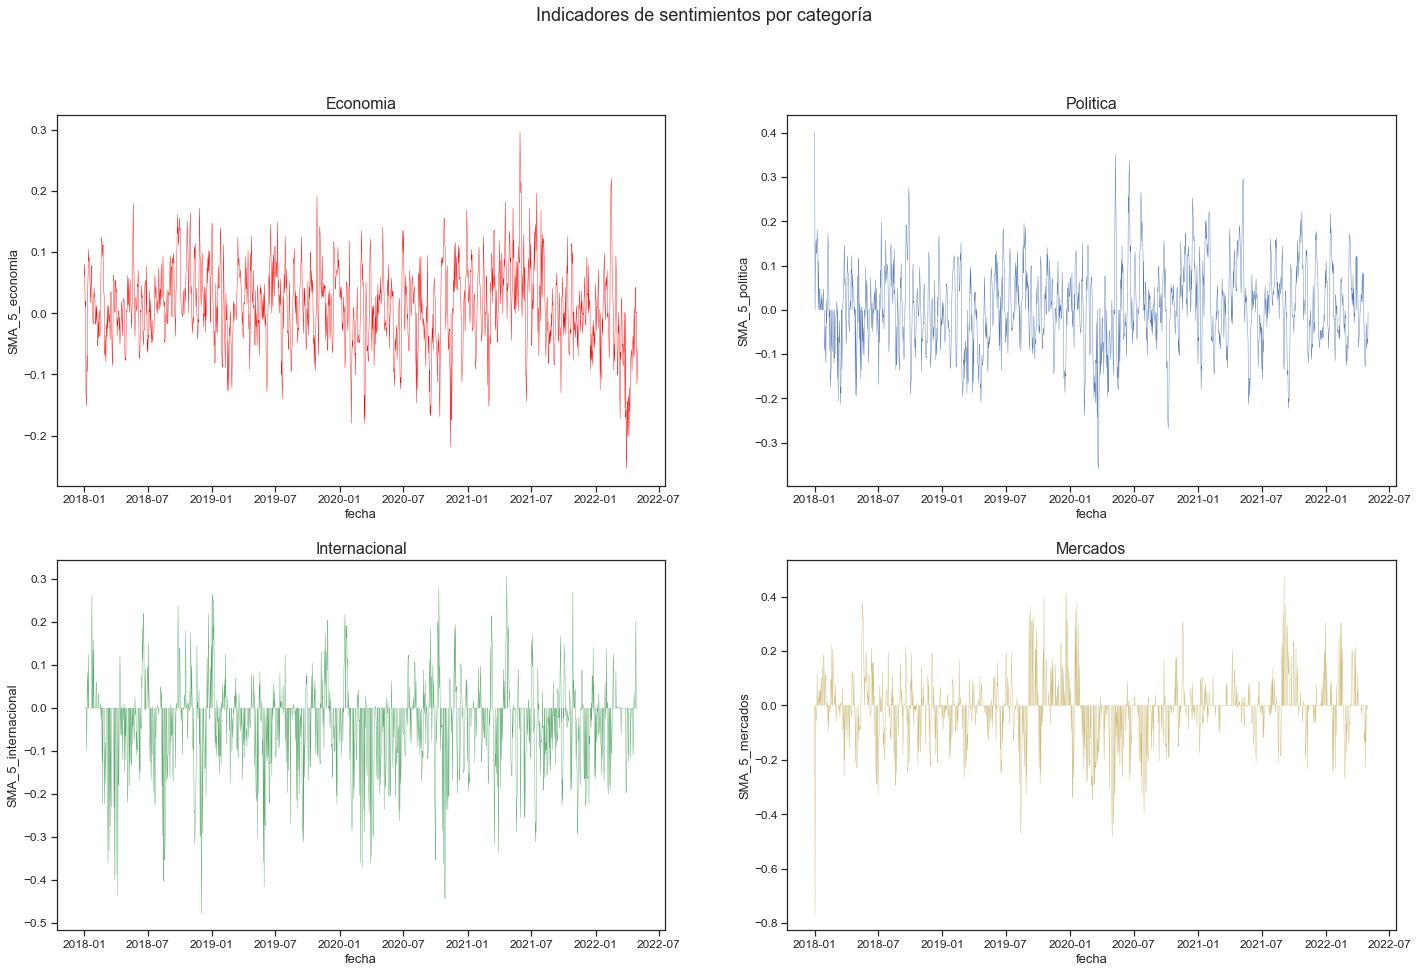

In [83]:
sns.set('notebook', style = "ticks", font_scale= 1.08)
fig, axes = plt.subplots(2, 2, figsize=(24, 15))
fig.suptitle('Indicadores de sentimientos por categoría', fontsize = 18)

# Bulbasaur
sns.lineplot(data=indices, x = 'fecha', y = 'SMA_5_economia', color= 'red', ax = axes[0,0], lw = 0.4)
axes[0,0].set_title('Economia',fontsize = 16)

# Charmander
sns.lineplot(data=indices, x = 'fecha', y = 'SMA_5_politica', color= 'b', ax = axes[0,1], lw = 0.4)
axes[0,1].set_title('Politica',fontsize = 16)

# Squirtle
sns.lineplot(data=indices, x = 'fecha', y = 'SMA_5_internacional', color= 'g', ax = axes[1,0], lw = 0.4)
axes[1,0].set_title('Internacional',fontsize = 16)

#
sns.lineplot(data=indices, x = 'fecha', y = 'SMA_5_mercados', color= 'y', ax = axes[1,1], lw = 0.4)
axes[1,1].set_title('Mercados',fontsize = 16)


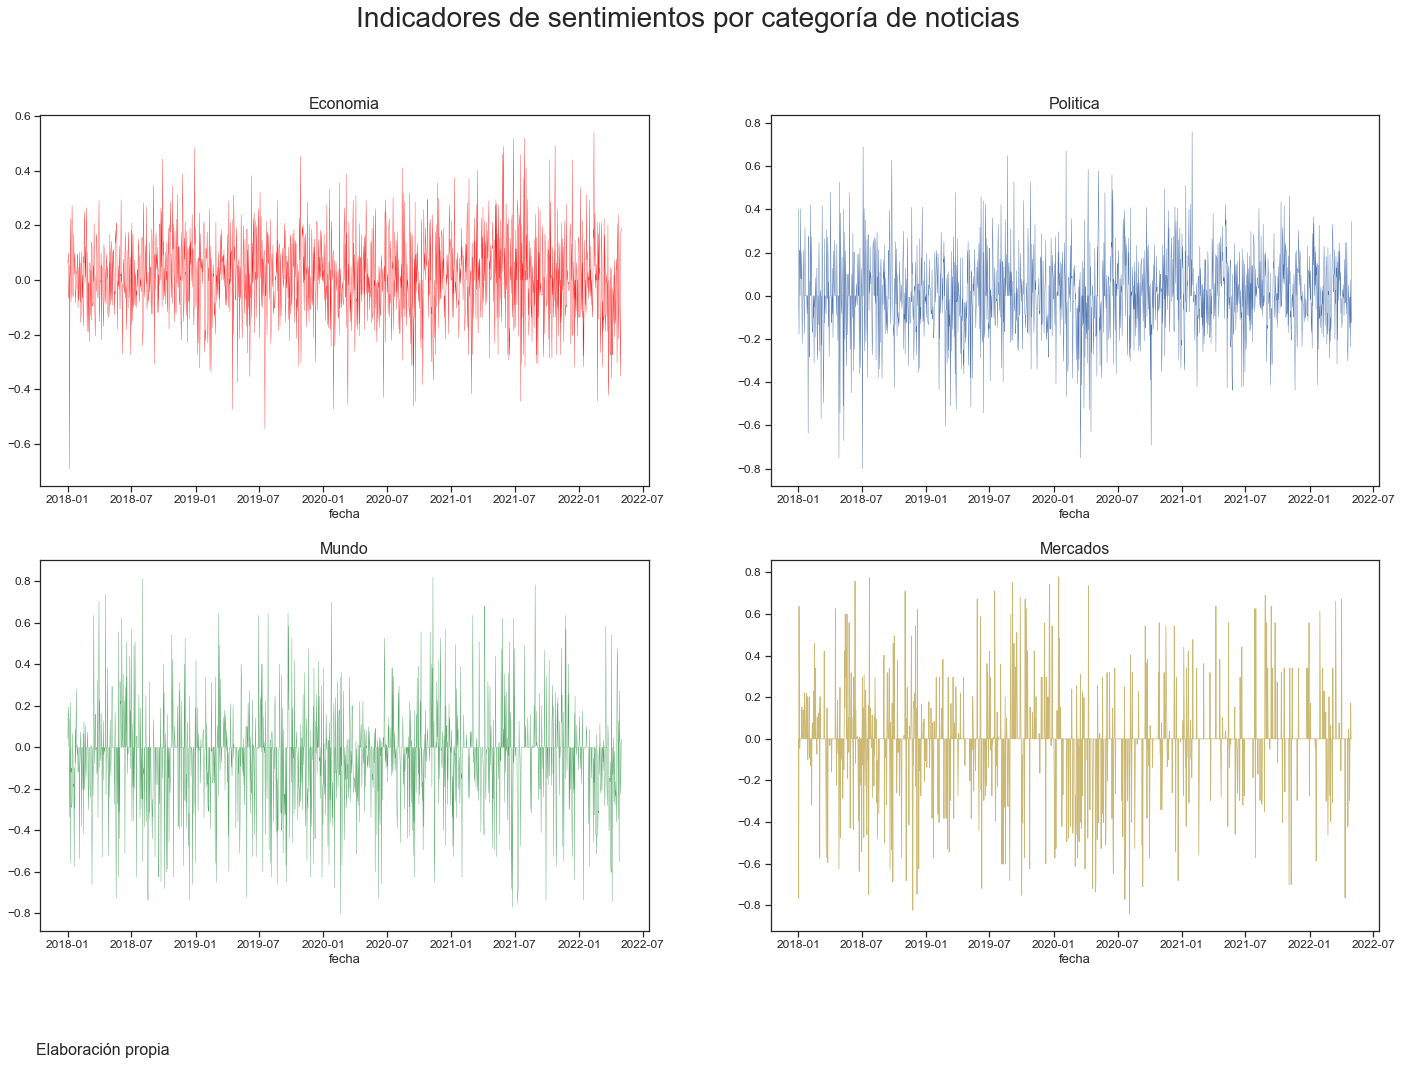

In [125]:
sns.set('notebook', style = "ticks", font_scale= 1.08)
fig, axes = plt.subplots(2, 2, figsize=(24, 15))
fig.suptitle('Indicadores de sentimientos por categoría de noticias', fontsize = 28)

# Economia
sns.lineplot(data=indices, x = 'fecha', y = 'economia_compound', color= 'red', ax = axes[0,0], lw = 0.3)
axes[0,0].set_title('Economia',fontsize = 16)
axes[0,0].set_ylabel('')

# Politica
sns.lineplot(data=indices, x = 'fecha', y = 'politica_compound', color= 'b', ax = axes[0,1], lw = 0.4)
axes[0,1].set_title('Politica',fontsize = 16)
axes[0,1].set_ylabel('')

# Mundo
sns.lineplot(data=indices, x = 'fecha', y = 'mundo_compound', color= 'g', ax = axes[1,0], lw = 0.4)
axes[1,0].set_title('Mundo',fontsize = 16)
axes[1,0].set_ylabel('')

#mercados
sns.lineplot(data=indices, x = 'fecha', y = 'mercados_compound', color= 'y', ax = axes[1,1], lw = 0.8)
axes[1,1].set_title('Mercados',fontsize = 16)
axes[1,1].set_ylabel('')

txt="Elaboración propia"  
plt.figtext(0.2, 0.01, txt, wrap=True, horizontalalignment='right', fontsize=16)

plt.savefig('../Plots/indices.png')

Text(0.5, 1.0, 'Mercados')

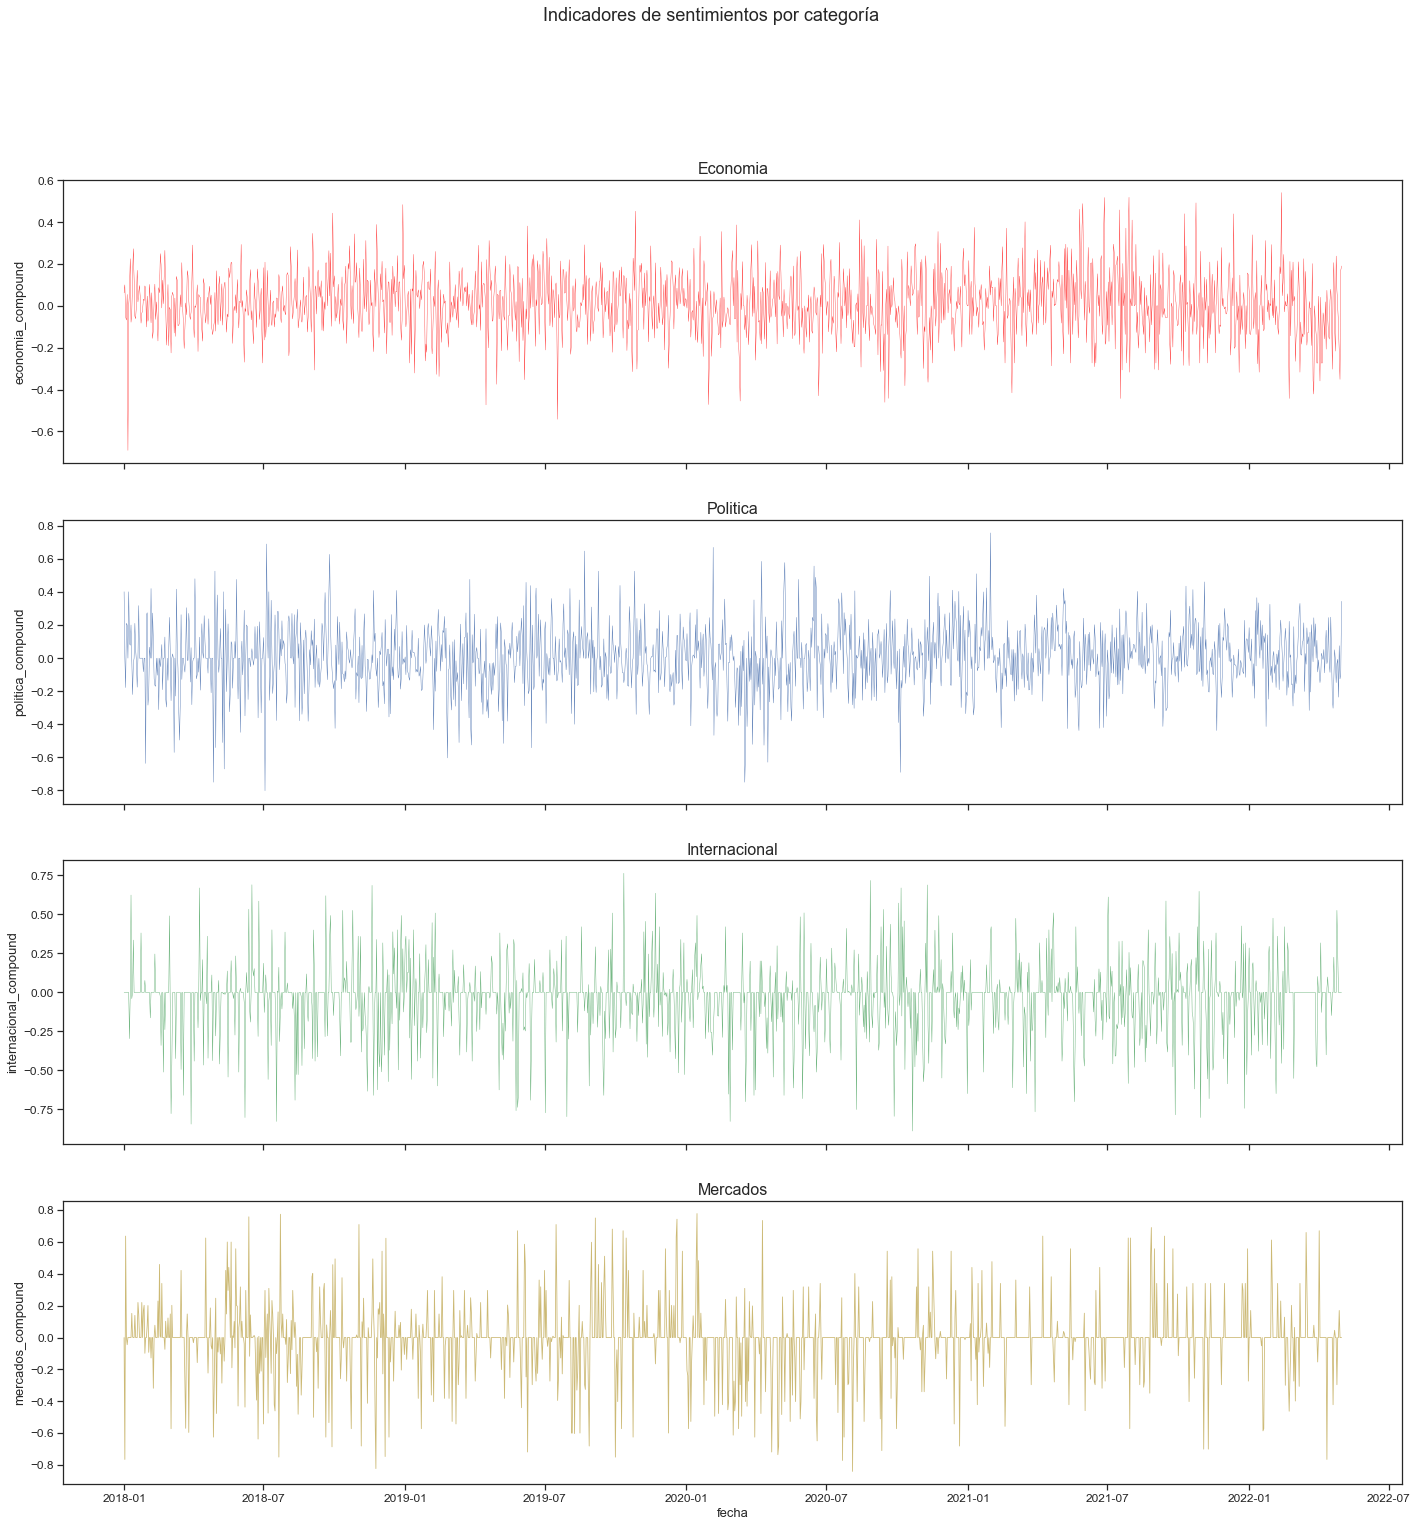

In [102]:
sns.set('notebook', style = "ticks", font_scale= 1.08)
fig, axes = plt.subplots(4, 1, figsize=(24, 24), sharex=True)
fig.suptitle('Indicadores de sentimientos por categoría', fontsize = 18)

# Bulbasaur
sns.lineplot(data=indices, x = 'fecha', y = 'economia_compound', color= 'red', ax = axes[0], lw = 0.3)
axes[0].set_title('Economia',fontsize = 16)

# Charmander
sns.lineplot(data=indices, x = 'fecha', y = 'politica_compound', color= 'b', ax = axes[1], lw = 0.4)
axes[1].set_title('Politica',fontsize = 16)

# Squirtle
sns.lineplot(data=indices, x = 'fecha', y = 'internacional_compound', color= 'g', ax = axes[2], lw = 0.4)
axes[2].set_title('Internacional',fontsize = 16)

#
sns.lineplot(data=indices, x = 'fecha', y = 'mercados_compound', color= 'y', ax = axes[3], lw = 0.8)
axes[3].set_title('Mercados',fontsize = 16)